In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Social_Network_ads.csv")


In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
X=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [8]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (400, 2)
y shape: (400,)


In [9]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y
    ,test_size=0.30,
    random_state=0,
    stratify=y
)

In [11]:
print("Train shape:",X_train.shape)
print("Test shape:",X_test.shape)

Train shape: (280, 2)
Test shape: (120, 2)


,Age,EstimatedSalary
335,36,54000
105,21,72000
350,38,113000
179,31,34000
333,40,65000
...,...,...
231,39,42000
175,23,28000
64,59,83000
19,48,29000


In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [20]:
print("Scaler mean:",scaler.mean_)
print("Scaler std:",scaler.scale_)

Scaler mean: [3.76857143e+01 6.96178571e+04]
Scaler std: [1.05556929e+01 3.39635367e+04]


In [21]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [22]:
print("✅ Before Scaling (Train):")
print(np.round(X_train.describe(), 2))

print("\n✅ After Scaling (Train):")
print(np.round(X_train_scaled_df.describe(), 2))

✅ Before Scaling (Train):
          Age  EstimatedSalary
count  280.00           280.00
mean    37.69         69617.86
std     10.57         34024.35
min     18.00         15000.00
25%     29.00         43000.00
50%     37.00         71000.00
75%     46.00         88000.00
max     60.00        150000.00

✅ After Scaling (Train):
          Age  EstimatedSalary
count  280.00           280.00
mean     0.00            -0.00
std      1.00             1.00
min     -1.86            -1.61
25%     -0.82            -0.78
50%     -0.06             0.04
75%      0.79             0.54
max      2.11             2.37


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [25]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [26]:
print("✅ Accuracy WITHOUT scaling:", accuracy_score(y_test, y_pred))


✅ Accuracy WITHOUT scaling: 0.825


In [27]:
# 2) With Scaling
lr_scaled = LogisticRegression(max_iter=1000)
lr_scaled.fit(X_train_scaled_df, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled_df)


In [28]:
print("✅ Accuracy WITH scaling:", accuracy_score(y_test, y_pred_scaled))


✅ Accuracy WITH scaling: 0.8166666666666667


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print("📌 Confusion Matrix (WITHOUT scaling):")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Confusion Matrix (WITH scaling):")
print(confusion_matrix(y_test, y_pred_scaled))

print("\n📌 Classification Report (WITH scaling):")
print(classification_report(y_test, y_pred_scaled))


📌 Confusion Matrix (WITHOUT scaling):
[[70  7]
 [14 29]]

📌 Confusion Matrix (WITH scaling):
[[70  7]
 [15 28]]

📌 Classification Report (WITH scaling):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.80      0.65      0.72        43

    accuracy                           0.82       120
   macro avg       0.81      0.78      0.79       120
weighted avg       0.82      0.82      0.81       120



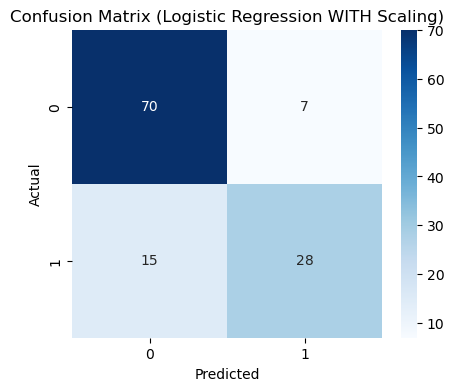

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_scaled)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression WITH Scaling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ RAW (without scaling) decision boundary
def plot_decision_boundary_raw(X_df, y, model, title, step_age=0.5, step_salary=1000):
    x_min, x_max = X_df["Age"].min() - 1, X_df["Age"].max() + 1
    y_min, y_max = X_df["EstimatedSalary"].min() - 1000, X_df["EstimatedSalary"].max() + 1000

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step_age),
        np.arange(y_min, y_max, step_salary)
    )

    grid_df = pd.DataFrame({
        "Age": xx.ravel(),
        "EstimatedSalary": yy.ravel()
    })

    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_df["Age"], X_df["EstimatedSalary"], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("EstimatedSalary")
    plt.show()


# ✅ SCALED (with scaling) decision boundary
def plot_decision_boundary_scaled(X_scaled_df, y, model, title, step=0.02):
    x_min, x_max = X_scaled_df.iloc[:, 0].min() - 1, X_scaled_df.iloc[:, 0].max() + 1
    y_min, y_max = X_scaled_df.iloc[:, 1].min() - 1, X_scaled_df.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )

    grid_df = pd.DataFrame(
        np.c_[xx.ravel(), yy.ravel()],
        columns=X_scaled_df.columns
    )

    Z = model.predict(grid_df).reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("Age (scaled)")
    plt.ylabel("EstimatedSalary (scaled)")
    plt.show()


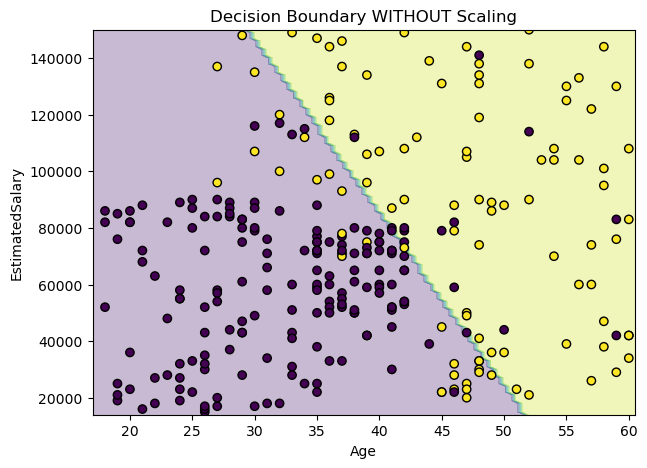

In [36]:
plot_decision_boundary_raw(
    X_train, y_train, lr,
    "Decision Boundary WITHOUT Scaling",
    step_age=0.5,
    step_salary=1000
)


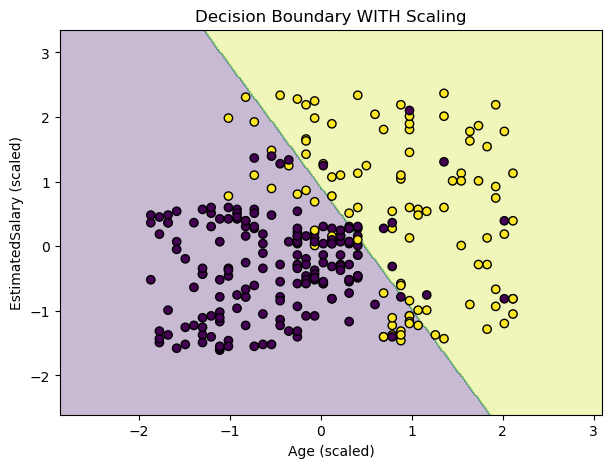

In [37]:
plot_decision_boundary_scaled(
    X_train_scaled_df, y_train, lr_scaled,
    "Decision Boundary WITH Scaling",
    step=0.02
)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ✅ 1) KNN WITHOUT scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("✅ KNN Accuracy WITHOUT scaling:", accuracy_score(y_test, y_pred_knn))

# ✅ 2) KNN WITH scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled_df, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled_df)

print("✅ KNN Accuracy WITH scaling:", accuracy_score(y_test, y_pred_knn_scaled))


✅ KNN Accuracy WITHOUT scaling: 0.7833333333333333
✅ KNN Accuracy WITH scaling: 0.8916666666666667


In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ✅ MinMax Scaling
minmax = MinMaxScaler()

# fit only on train
minmax.fit(X_train)

X_train_minmax = minmax.transform(X_train)
X_test_minmax = minmax.transform(X_test)

# convert to dataframe
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns=X_test.columns)

# Train Logistic Regression on MinMax scaled data
lr_minmax = LogisticRegression(max_iter=1000)
lr_minmax.fit(X_train_minmax_df, y_train)

y_pred_minmax = lr_minmax.predict(X_test_minmax_df)

print("✅ Logistic Regression Accuracy with MinMax Scaling:", accuracy_score(y_test, y_pred_minmax))


✅ Logistic Regression Accuracy with MinMax Scaling: 0.8
